In [142]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [192]:
df = pd.read_csv('output/bench.csv')
df.head()

,n,b,v,bf,ga,dp
0,1,100,25,0.000003,0.000006,0.000044
1,1,100,50,0.000002,0.000005,0.000031
2,1,100,75,0.000002,0.000003,0.000030
3,1,100,100,0.000001,0.000003,0.000031
4,1,100,125,0.000001,0.000003,0.000031


25
20
50
20
75
20
100
20
125
20
150
20
175
20
200
20


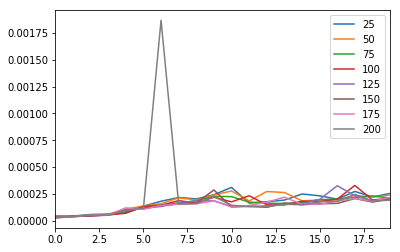

In [204]:
ga = pd.DataFrame(index=list(range(0, 20)))
for v in df['v'].unique():
    print(v)
    print(len(df[df['v']==v]))
    s = df[df['v'] == v]['dp']
    s.index=ga.index
    ga[v]=s
    
ga.plot(xlim=(0,19))

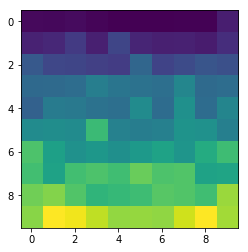

In [145]:
fig, ax = plt.subplots()

def cmap(series):
    values = sorted(list(set(series)))
    return {e: i for i, e in enumerate(values)}

N, B, V = df['n'], df['b'], df['v']
X, Y, Z = cmap(N), cmap(B), cmap(V)
m = np.ndarray((len(X), len(Z)))
        
for _, row in df.iterrows():
    x, y, z = X[row['n']], Y[row['b']], Z[row['v']]
    m[x,z]=row['ga']
    
plt.imshow(m)